In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_squared_error

### 1. Loading and Exploring Dataset

In [2]:
#Loading the dataset

df=pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
# Basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [4]:
#Statistical values of dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
#finding the shape of dataset
df.shape

(398, 8)

In [6]:
#finding the datatypes
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [7]:
#Finding the null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
#Handling Missing values

df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mode()[0])

### 2. Data Preprocessing

In [9]:
#Finding the unique values of origin
df["origin"].unique()

array([1, 3, 2], dtype=int64)

In [10]:
#applying one-hot encoding to origin

df = pd.get_dummies(df, columns=['origin'])
df[['origin_1','origin_2','origin_3']]=df[['origin_1','origin_2','origin_3']].astype(int)

In [11]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin_1          int32
origin_2          int32
origin_3          int32
dtype: object

In [12]:
temp_cylinder=df["cylinders"].value_counts()

In [13]:
# Applying Frequency Encoding on Cylinders
df["cylinders"]=df["cylinders"].apply(lambda x:temp_cylinder[x])
df[["cylinders"]].head()

,cylinders
0,103
1,103
2,103
3,103
4,103


In [14]:
#Creating New Features

df['power_to_weight'] = df['horsepower'] / df['weight']  
df['displacement_to_cylinders'] = df['displacement'] / df['cylinders']

In [15]:
cols=['displacement', 'horsepower', 'weight','acceleration']

In [16]:
#applying Standardization
scaler=StandardScaler()

In [17]:
scaled=scaler.fit_transform(df[cols])
df[cols]=scaled

In [18]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3,power_to_weight,displacement_to_cylinders
0,18.0,103,1.090604,0.644426,0.630870,-1.295498,70,1,0,0,0.037100,2.980583
1,15.0,103,1.503514,1.552280,0.854333,-1.477038,70,1,0,0,0.044679,3.398058
2,18.0,103,1.196232,1.163200,0.550470,-1.658577,70,1,0,0,0.043655,3.087379
3,16.0,103,1.061796,1.163200,0.546923,-1.295498,70,1,0,0,0.043694,2.951456
4,17.0,103,1.042591,0.903813,0.565841,-1.840117,70,1,0,0,0.040591,2.932039
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,204,-0.513026,-0.496876,-0.213324,0.011586,82,1,0,0,0.030824,0.686275
394,44.0,204,-0.925936,-1.378791,-0.993671,3.279296,82,0,1,0,0.024413,0.475490
395,32.0,204,-0.561039,-0.548753,-0.798585,-1.440730,82,1,0,0,0.036601,0.661765
396,28.0,204,-0.705077,-0.678446,-0.408411,1.100822,82,1,0,0,0.030095,0.588235


In [19]:
#Splitting the data into X and Y

X=df.drop(["mpg"],axis=1)
y=df["mpg"]

In [20]:
#Splitting dataset into train  and test sets
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
x_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3,power_to_weight,displacement_to_cylinders
3,103,1.061796,1.163200,0.546923,-1.295498,70,1,0,0,0.043694,2.951456
18,204,-0.925936,-0.444998,-0.993671,-0.387801,70,0,0,1,0.041315,0.475490
376,204,-0.983552,-0.963772,-1.117818,0.955591,82,0,0,1,0.033580,0.446078
248,204,-0.983552,-1.171281,-1.383845,0.302049,78,0,0,1,0.033333,0.446078
177,204,-0.753090,-0.263428,-0.326829,-0.206262,75,0,1,0,0.035264,0.563725


### 3. Data Visualization

In [22]:
columns=df.columns
columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_1', 'origin_2', 'origin_3',
       'power_to_weight', 'displacement_to_cylinders'],
      dtype='object')

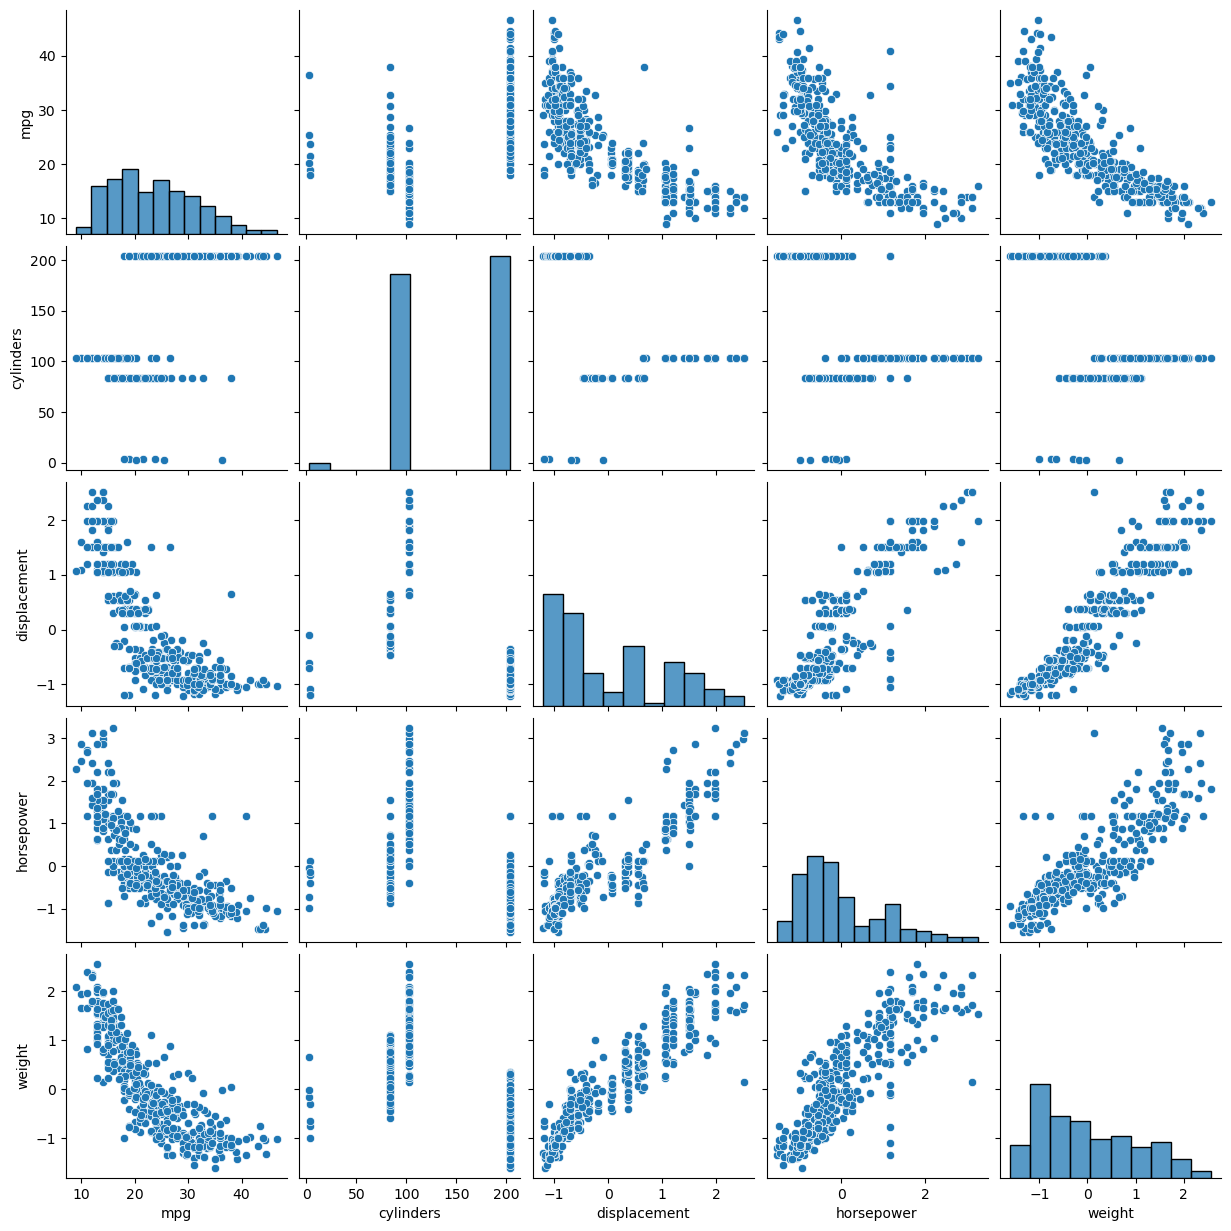

In [23]:
#pair plot for 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight'
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']])
plt.show()

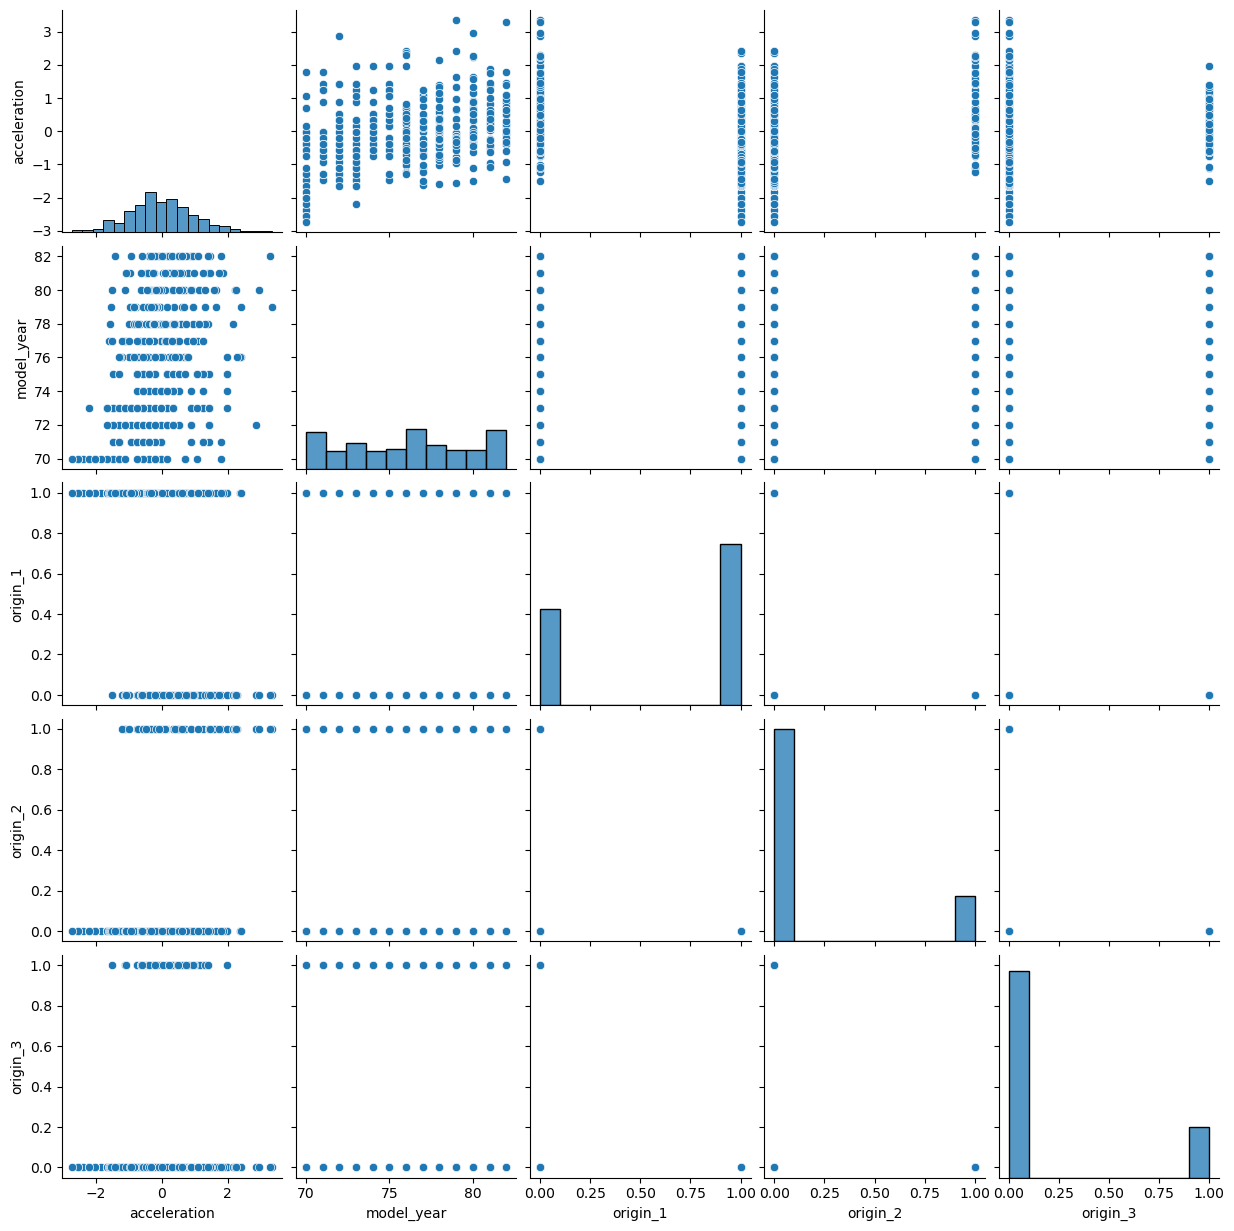

In [24]:
#Pair plot
sns.pairplot(df[['acceleration', 'model_year', 'origin_1', 'origin_2', 'origin_3']])
plt.show()

### 4. Building the Machine Learning Model

In [25]:
# Define the model

model=tf.keras.Sequential([ 
    tf.keras.layers.Dense(16,activation='relu'),                 # First hidden layer
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8,activation='relu'),                 # Second hidden layer
    tf.keras.layers.Dense(1)                                    # Output layer 
])

# Compile the model
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

### 5. Model Training & Optimization

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback 
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(x_test, y_test), 
                    callbacks=[early_stop], 
                    verbose=1)


Epoch 1/50


### 6. Model Evaluation

In [ ]:
# Plot training & validation loss

plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Model Training Loss")
plt.show()


In [ ]:
# Evaluate the model

test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")  